# Assignment 2

To be delivered until 2023/12/27 23:59:59.

## 1) Arduino

You will start by setting up a series of connections in order to extract some data with the Arduino. First make the connections as shown below. **Mind the direction of the temperature sensor. If you have an incorrect position, you will be connection the power to the ground and vice-versa and you will damage the sensor.** The photoresistor sensor on the other hand has no polarity.

<img src="https://github.com/guilhermejoaquim08/AA_Project/blob/master/laboratory/L4_Arduino/temp_photo_cropped.png?raw=1" width=1000/>

On this problem, you will read temperature and luminance from the sensors and print them on the serial.

**1)** Code an Arduino sketch, where the value of temperature and luminance are printed to the serial. For each serial print that you make, print the value of temperature, then a semicolon, then the value of luminance with a new line (use no whitespaces). You can do this by using three separate `Serial.print`, with the last one being a `Serial.println`. Print values 5 times per second (use the delay function to control this). Manually influence the readings of the sensors, by covering the photoresistor or shining light on it, and by lightly and carefully touching the temperature sensor to increase its temperature readings.

**Note that the temperature sensor appears not to be very reliable. Since the objective of this exercise is just to plot the results, this should not be an issue.**

**Copy and paste your arduino code below. You may use a python code cell, even though the code can not be run.**

*Hint: for the temperature value to be in celsius, divide the read value by 1024 and multiply it by 500. The luminance does not have to be converted*

In [ ]:
const int temperaturePin = A1;
const int lightPin = A0;

void setup() {
  // put your setup code here, to run once:
  Serial.begin(9600);

}

void loop() {
  // Read the analog value from the temperature sensor
  int rawTemperatureValue = analogRead(temperaturePin);

  // Convert the raw analog value to temperature in degrees Celsius
  float temperatureCelsius = (rawTemperatureValue / 1024.0) * 500.0;

  // Read the analog value from the light sensor
  int rawLightValue = analogRead(lightPin);

  // Print temperature and light values to the Serial Monitor
  Serial.print(temperatureCelsius);
  Serial.print(";");
  Serial.println(rawLightValue);

  // Add a delay to control the update rate (5 times per second)
  delay(200);
}

To import the data into Arduino, keep it running (the Serial Monitor must be closed in Arduino) and run the following code. Change the COM port to your own. This block of code will read 1000 values from the Serial. Given that each observation is taken every 0.2 seconds, it should take a minute and a half.

In [ ]:
import serial
import time

ser = serial.Serial('COM4', 9600, timeout=1)
time.sleep(2)

data = []
for i in range(500):
    line = ser.readline()
    if line:
        string = line.decode()
        data.append(string)

ser.close()

Convert the data into a pandas dataframe and save it in a csv file. Besides the value of temperature and luminance, also include the time, considering the first observation at $t=0$ and every observation 0.2 seconds after the previous one. **The file must be submitted in Fenix and included in your Github repo**.

In [ ]:
import pandas as pd

df = pd.DataFrame(data)
df.to_csv("Temeperature_Light.csv")

Plot the Temperature against time, the luminance against time and the temperature against the luminance.

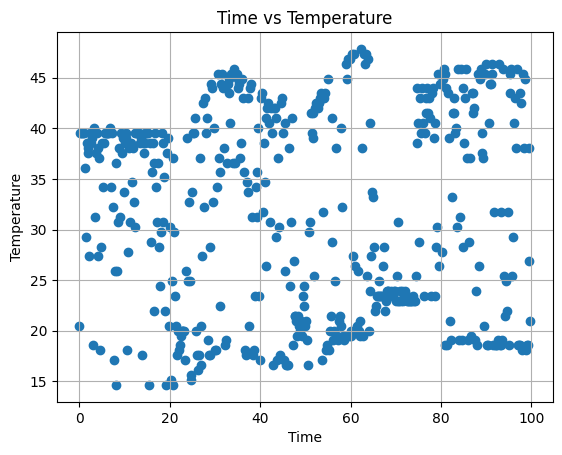

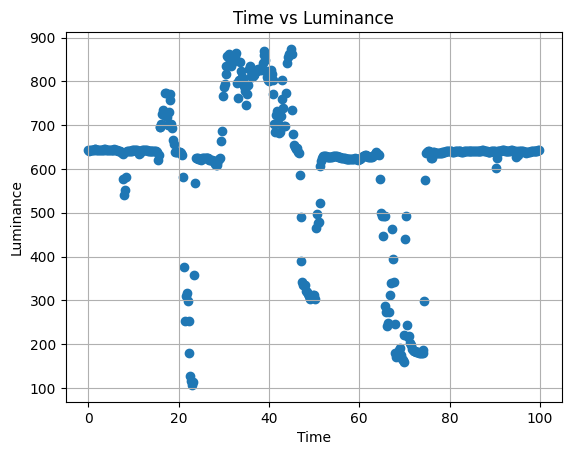

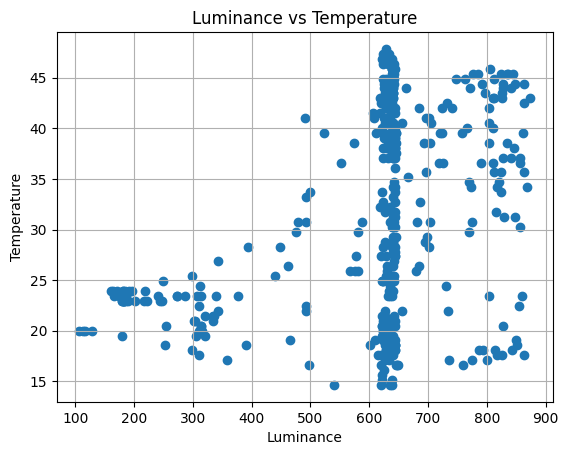

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Temeperature_Light.csv', header=None)

df[[1, 2]] = df[1].str.split(';', expand=True)

df[2] = df[2].str.replace(r'\r\n', '', regex=True)

df[0] = 0.2*df[0]
df[1] = pd.to_numeric(df[1])
df[2] = pd.to_numeric(df[2])

df.columns = ['Time','Temperature','Luminance']

df.dropna(inplace=True)

plt.scatter(df['Time'], df['Temperature'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Time vs Temperature')
plt.grid(True)
plt.show()

plt.scatter(df['Time'], df['Luminance'])
plt.xlabel('Time')
plt.ylabel('Luminance')
plt.title('Time vs Luminance')
plt.grid(True)
plt.show()

plt.scatter(df['Luminance'], df['Temperature'])
plt.xlabel('Luminance')
plt.ylabel('Temperature')
plt.title('Luminance vs Temperature')
plt.grid(True)
plt.show()

## 2) Databases

For the databases part of this assignment, you will use the mimic-iii database from the laboratory session. Start by adding a few new tables to the database, using the SQL files included in the assignment's files. Open PGAdmin and connect to your mimic-iii database. **To properly load these tables, load the following files exactly and by the order presented.**

1) Run demographic.sql

2) Run lab_firstday.sql

You will now have to answer a few SQL questions.

**1.** Open the connection to your mimic-iii database. If you want, you can delete your credentials before submitting the assignment, but if you do so, please run the notebook first, for the results to be displayed.

In [ ]:
import pandas as pd
import numpy as np
import psycopg2 as psql
import matplotlib.pyplot as plt

conn = psql.connect(host='localhost',
                    database='mimic-iii',
                    #user='your_username',
                    #password='your_password',
                    user='postgres',
                    password='guilhermejoaquim',
                    port=5432)

#Create a cursor object using the cursor() method
cursor = conn.cursor()

#Execute a SQL function using the execute() method
cursor.execute("select version()")

#Fetch a single row using fetchone() method
data = cursor.fetchone()
print("Connection established to: ", data)

Connection established to:  ('PostgreSQL 16.1, compiled by Visual C++ build 1937, 64-bit',)


**2.** Create a function that receives an SQL query and automatically opens a cursor, queries the database, extracts the columns, creates a pandas database, and closes the connections.

In [ ]:
import pandas as pd
import psycopg2 as psql

def execute_query(sql_query):
    try:
        # Establish a connection to the database
        conn = psql.connect(host='localhost', database='mimic-iii', user='postgres', password='guilhermejoaquim', port=5432)

        # Create a cursor object using the cursor() method
        cursor = conn.cursor()
        # Execute SQL query
        cursor.execute(sql_query)

        # Fetch all column names from the query result
        col_names = [desc[0] for desc in cursor.description]

        # Fetch all rows from the query result
        rows = cursor.fetchall()

        # Create a pandas DataFrame with the fetched data and column names
        df = pd.DataFrame(rows, columns=col_names)

        return df

    except Exception as e:
        print("Error executing query:", e)
        return None

# Establish a connection to the database
conn = psql.connect(host='localhost', database='mimic-iii', user='postgres', password='guilhermejoaquim', port=5432)

# Create a cursor object using the cursor() method
cursor = conn.cursor()

# Retrieve the 'demographics' table
sql_query = "SELECT * FROM demographics;"  # Change 'demographics' to your table name
result_df1 = execute_query(sql_query)

# Retrieve the 'pivoted_lab' table
sql_query = "SELECT * FROM pivoted_lab;"  # Change 'pivoted_lab' to your table name
result_df2 = execute_query(sql_query)

# Close the cursor and connection after executing all queries
cursor.close()
conn.close()

**3.** Query the table admissions filtering for admission type as emergency and insurance as private.

In [ ]:
# Filter for admission type as emergency and insurance as private

query = """
    SELECT *FROM admissions
    WHERE admission_type = 'EMERGENCY' AND insurance = 'Private'
"""

# Execute the query using the execute_query function
result_df3 = execute_query(query)


**4.** Query the table admissions, filtering for the same conditions as the previous exercise (admission type as emergency and insurance as private). Join the "drgcodes" table on the admission ID. Display only the columns regarding the subject id, admission id, time of death, and description of the drug.

In [ ]:
# Filter for admission type as emergency and insurance as private

query = """
    SELECT a.subject_id, a.hadm_id, a.deathtime, d.description
    FROM admissions a
    JOIN drgcodes d ON a.hadm_id = d.hadm_id
    WHERE a.admission_type = 'EMERGENCY' AND a.insurance = 'Private'
"""

# Execute the query using the execute_query function
result_df4 = execute_query(query)

**5.1.** Obtain the dataset for this problem, by running the SQL query below.

In [ ]:
query = "SELECT pivoted_lab.*," +\
                "gender as gender," +\
                "admission_age," +\
                "ethnicity_grouped as eth_grp," +\
                "hospital_expire_flag," +\
                "los_icu " +\
        "FROM demographics " +\
        "LEFT JOIN pivoted_lab " +\
        "ON demographics.icustay_id = pivoted_lab.icustay_id " +\
        "WHERE first_icu_stay = true"

result_df5 = execute_query(query)

**5.2.** Close the connection to your SQL server.

In [ ]:
conn.close()

**5.3.** Prepare your dataset:

* Drop the ID columns of subject, admission and ICU stay.
* Drop columns with at least one NA value.
* Encode the categorical columns, the ethnicity and gender ('eth_grp', 'gender'). *Suggestion: use pd.get_dummies*
* Consider the column 'hospital_expire_flag' as the response and all remaining columns as the predictors.

In [ ]:
# Drop the ID columns of subject, admission, and ICU stay
result_df6 = result_df5.drop(['subject_id', 'hadm_id', 'icustay_id'], axis=1)

# Drop columns with at least one NA value
result_df6 = result_df6.dropna(axis=1)

# Encode categorical columns using pd.get_dummies
result_df6 = pd.get_dummies(result_df6, columns=['eth_grp', 'gender'], drop_first=True)

# Consider 'hospital_expire_flag' as the response and all remaining columns as predictors
X = result_df6.drop('hospital_expire_flag', axis=1)
y = result_df6['hospital_expire_flag']

**6.** Fit the following tree-based classifiers to the dataset. For each method:

* Perform k-fold cross validation to evaluate the models. Consider 10 folds.

* Plot the ROC curves for each fold, along with the mean ROC curve.

* Calculate the mean AUC.

**a.** Decision tree.

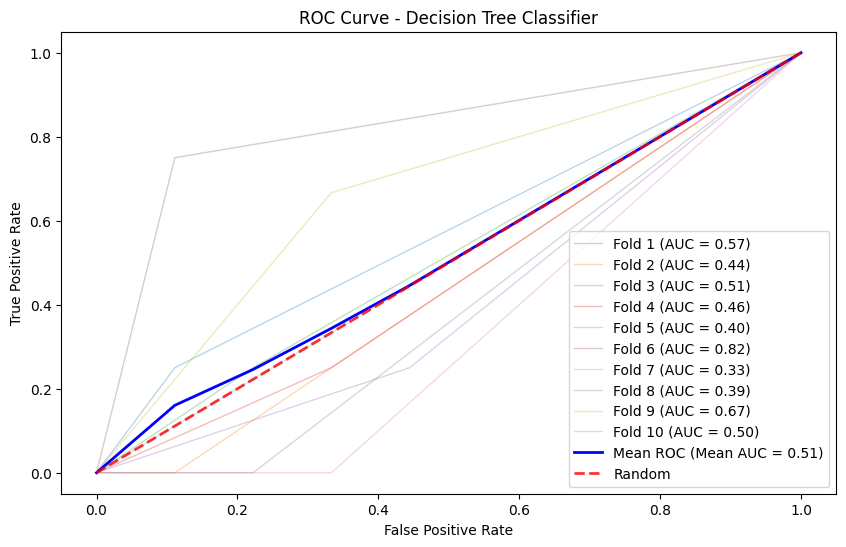

Mean AUC for decision tree: 0.51


In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are your predictors and response variables

# Instantiate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a StratifiedKFold object for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store results
mean_fpr = np.linspace(0, 1, 100)
tpr_list = []
auc_list = []

# Perform k-fold cross-validation
for train, test in cv.split(X, y):
    # Train the model
    dt_classifier.fit(X.iloc[train], y.iloc[train])

    # Predict the probabilities
    y_probs = dt_classifier.predict_proba(X.iloc[test])[:, 1]

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], y_probs)
    roc_auc = auc(fpr, tpr)

    # Interpolate the ROC curve to mean_fpr
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tpr_list.append(interp_tpr)
    auc_list.append(roc_auc)

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(tpr_list)):
    plt.plot(mean_fpr, tpr_list[i], lw=1, alpha=0.3, label=f'Fold {i + 1} (AUC = {auc_list[i]:.2f})')

# Plot the mean ROC curve
mean_tpr = np.mean(tpr_list, axis=0)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (Mean AUC = {np.mean(auc_list):.2f})', lw=2)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

# Calculate mean AUC
mean_auc = np.mean(auc_list)
print(f'Mean AUC for decision tree: {mean_auc:.2f}')

**b.** Random forest

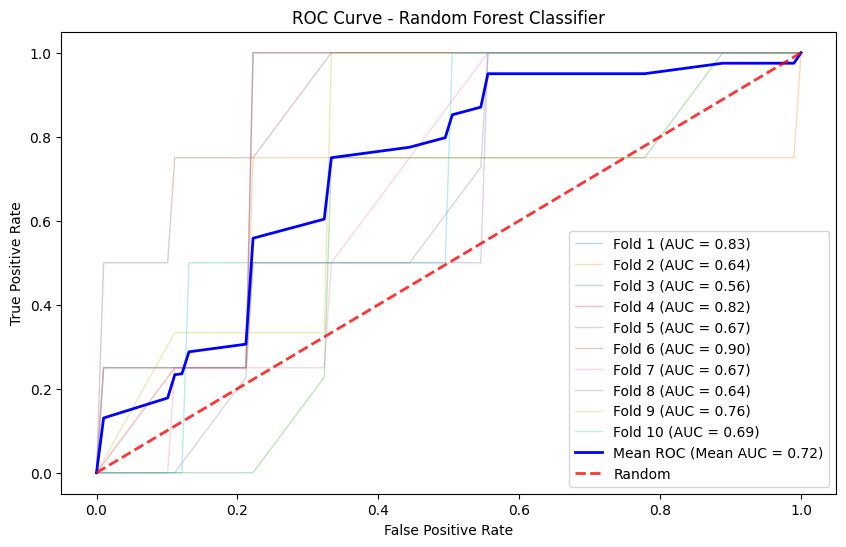

Mean AUC for Random Forest: 0.72


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize variables to store results
tpr_list_rf = []
auc_list_rf = []

# Perform k-fold cross-validation
for train, test in cv.split(X, y):
    # Train the model
    rf_classifier.fit(X.iloc[train], y.iloc[train])

    # Predict the probabilities
    y_probs_rf = rf_classifier.predict_proba(X.iloc[test])[:, 1]

    # Compute ROC curve and area under the curve
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y.iloc[test], y_probs_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    # Interpolate the ROC curve to mean_fpr
    interp_tpr_rf = np.interp(mean_fpr, fpr_rf, tpr_rf)
    interp_tpr_rf[0] = 0.0
    tpr_list_rf.append(interp_tpr_rf)
    auc_list_rf.append(roc_auc_rf)

# Plot ROC curves for Random Forest
plt.figure(figsize=(10, 6))
for i in range(len(tpr_list_rf)):
    plt.plot(mean_fpr, tpr_list_rf[i], lw=1, alpha=0.3, label=f'Fold {i + 1} (AUC = {auc_list_rf[i]:.2f})')

# Plot the mean ROC curve for Random Forest
mean_tpr_rf = np.mean(tpr_list_rf, axis=0)
plt.plot(mean_fpr, mean_tpr_rf, color='b', label=f'Mean ROC (Mean AUC = {np.mean(auc_list_rf):.2f})', lw=2)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

# Calculate mean AUC for Random Forest
mean_auc_rf = np.mean(auc_list_rf)
print(f'Mean AUC for Random Forest: {mean_auc_rf:.2f}')

**c.** Gradient Boosting

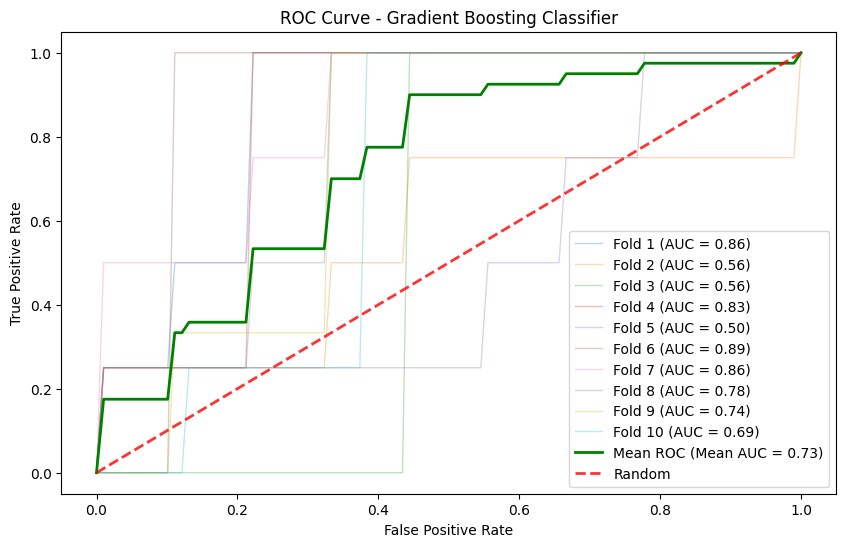

Mean AUC for Gradient Boosting: 0.73


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Initialize variables to store results
tpr_list_gb = []
auc_list_gb = []

# Perform k-fold cross-validation
for train, test in cv.split(X, y):
    # Train the model
    gb_classifier.fit(X.iloc[train], y.iloc[train])

    # Predict the probabilities
    y_probs_gb = gb_classifier.predict_proba(X.iloc[test])[:, 1]

    # Compute ROC curve and area under the curve
    fpr_gb, tpr_gb, thresholds_gb = roc_curve(y.iloc[test], y_probs_gb)
    roc_auc_gb = auc(fpr_gb, tpr_gb)

    # Interpolate the ROC curve to mean_fpr
    interp_tpr_gb = np.interp(mean_fpr, fpr_gb, tpr_gb)
    interp_tpr_gb[0] = 0.0
    tpr_list_gb.append(interp_tpr_gb)
    auc_list_gb.append(roc_auc_gb)

# Plot ROC curves for Gradient Boosting
plt.figure(figsize=(10, 6))
for i in range(len(tpr_list_gb)):
    plt.plot(mean_fpr, tpr_list_gb[i], lw=1, alpha=0.3, label=f'Fold {i + 1} (AUC = {auc_list_gb[i]:.2f})')

# Plot the mean ROC curve for Gradient Boosting
mean_tpr_gb = np.mean(tpr_list_gb, axis=0)
plt.plot(mean_fpr, mean_tpr_gb, color='g', label=f'Mean ROC (Mean AUC = {np.mean(auc_list_gb):.2f})', lw=2)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()

# Calculate mean AUC for Gradient Boosting
mean_auc_gb = np.mean(auc_list_gb)
print(f'Mean AUC for Gradient Boosting: {mean_auc_gb:.2f}')


**7.1.** Perform a grid search cross-validation on the Gradient boosting methods, changing the value of the learning rate (0.01 to 0.5) and the number of estimators (50-500). Consider the mean AUC of the folds as the performance measure.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4 ,0.5],
    'n_estimators': list(range(50, 501, 10))
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X, y)

# Display the best parameters and corresponding AUC score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)
best_learning_rate = grid_search.best_params_['learning_rate']
best_estimator = grid_search.best_params_['n_estimators']

#Train the model with best parameters
best_gb_classifier = GradientBoostingClassifier(learning_rate=best_learning_rate, n_estimators=best_estimator)
best_gb_classifier.fit(X, y)

# Retrieve feature importances
feature_importances = best_gb_classifier.feature_importances_

# Determine top N important features
N = 5  # Number of top features to display
top_N_indices = feature_importances.argsort()[-N:][::-1]  # Get indices of top N important features

# Print top N important features and their importance values
print(f"Top {N} Important Features:")
for index in top_N_indices:
    print(f"Feature Name: {X.columns[index]}, Importance: {feature_importances[index]}")

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 430}
Best AUC Score: 0.7913194444444444
Top 5 Important Features:
Feature Name: bicarbonate_max, Importance: 0.13349166164615126
Feature Name: glucose_min, Importance: 0.13141844967993502
Feature Name: admission_age, Importance: 0.11857340665838272
Feature Name: bicarbonate_min, Importance: 0.09714297822345595
Feature Name: los_icu, Importance: 0.07651728925175676


**7.2.** Plot a scatterplot of the learning rate versus the number of estimators, with the mean AUC as the color gradient.

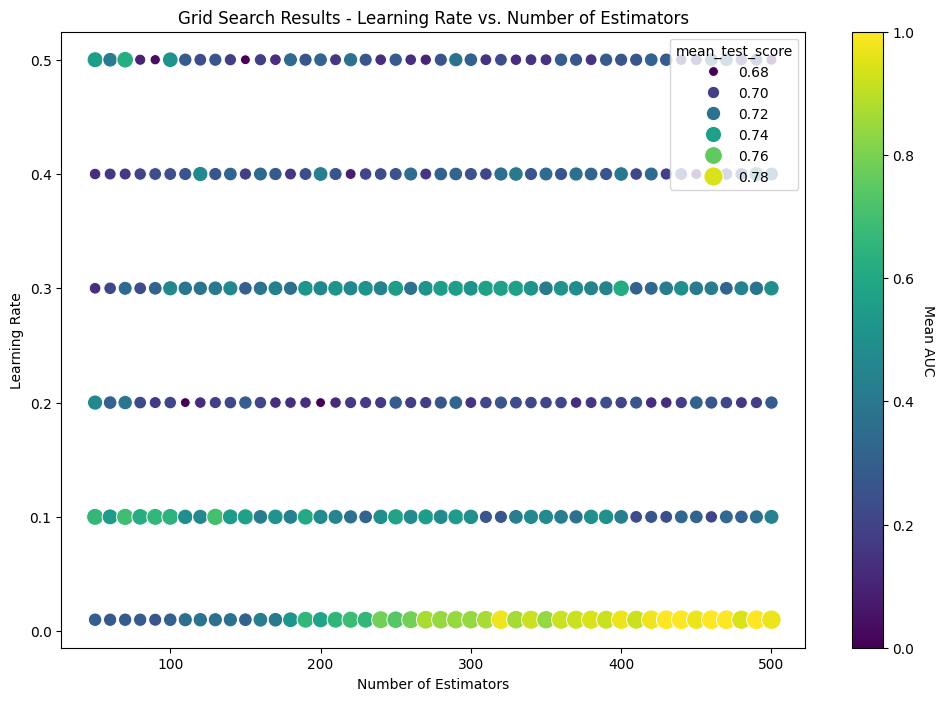

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Get the results from the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Create a scatterplot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='param_n_estimators',
    y='param_learning_rate',
    hue='mean_test_score',
    data=results,
    palette='viridis',
    size='mean_test_score',
    sizes=(50, 200),
    edgecolor='w'
)

# Set plot labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('Learning Rate')
plt.title('Grid Search Results - Learning Rate vs. Number of Estimators')

# Create a ScalarMappable to add colorbar
sm = ScalarMappable(cmap='viridis')
sm.set_array([])  # We need to set an empty array for the mappable

# Show colorbar
cbar = plt.colorbar(sm, ax=scatter)
cbar.set_label('Mean AUC', rotation=270, labelpad=15)

# Display the plot
plt.show()

**8.1.** Perform forward stepwise selection on the dataset. Use the best parameters of the gradient boosting method obtained in **7.1.**.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Assuming you have X and y from the previous steps
# X and y should be the predictors and response variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best parameters from grid search
best_params = {'learning_rate': best_learning_rate, 'n_estimators': best_estimator}

# Initialize an empty list to store selected features
selected_features = []

# Create a Gradient Boosting Classifier with the best parameters
gb_classifier = GradientBoostingClassifier(**best_params)

# Perform forward stepwise selection
for feature in X.columns:
    # Add the feature to the selected features
    selected_features.append(feature)

    # Train the model with the selected features
    gb_classifier.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = gb_classifier.predict_proba(X_test[selected_features])[:, 1]

    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred)

print(f"AUC Score: {auc_score}")

# Retrieve feature importances
feature_importances = gb_classifier.feature_importances_

# Get indices of top N important features
N = 5  # Number of top features to display
top_N_indices = feature_importances.argsort()[-N:][::-1]  # Get indices of top N important features

# Print top N important features and their importance values
print(f"Top {N} Important Features:")
for index in top_N_indices:
    print(f"Feature Name: {X.columns[index]}, Importance: {feature_importances[index]}")

AUC Score: 0.9166666666666666
Top 5 Important Features:
Feature Name: admission_age, Importance: 0.13519876101189143
Feature Name: glucose_min, Importance: 0.11877754817064465
Feature Name: bicarbonate_min, Importance: 0.11101095177565035
Feature Name: los_icu, Importance: 0.10492127777454563
Feature Name: bicarbonate_max, Importance: 0.0982728439684624


**8.2.** Compare and comment the results from **8.1.** with the features importance obtained through the grid search of queastion **7.1.**.

In step 7.1, we performed grid search cross-validation on the Gradient Boosting method, varying the learning rate and number of estimators. As a result, we obtained the best hyperparameters for the model, and during this process, we indirectly obtained information about feature importance.

Consecutively, in step 8.1, we applied forward stepwise selection on the dataset using the best parameters obtained from the grid search. The purpose of forward stepwise selection is to sequentially add features based on their contribution to model performance.

By comparing the results of the AUC score from both methods, it is unequivocal that the method in 8.1 outperformed the grid search in 7.1, having a greater AUC than the best parameters of the latter (0.9166666666666666 vs 0.7857638888888888). Moreover, it is obvious that the computacional time achieved in forward step selection is much smaller since it already had the best parameters as an input.

Furthermore, we can also verify that the most important estimators are the same for both methods, with the only difference being the importance of the said predictors and the order of importance. These were the most important predictors (in no specific order ) in both methods: admission_age; glucose_min; bicarbonate_min; los_icu; bicarbonate_max.

## 3) Theoretical Questions

**1.** Consider a dataset where best subset, forward stepwise and backward stepwise selection will be performed. For each of the 3 approaches, we obtain $p+1$ models, $p$ being the total number of predictors. This means that each approach has a model with 0 predictors, one with 1 predictor, one with 2 predictor, up until one model with $p$ predictors. Answer and justify the following questions:

**a)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest training RSS?

In theory the best subset selection can achieve the smallest training RSS compared to forward and backward stepwise selection because it considers all possible combinations of predictors. Also the model containing all the predictors will always have the smallest RSS, meaning that the best subset selection will cover this option. It may also happen that the other methods choose the same model.

**b)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest test RSS?

This is practically impossible to predict with no other data provided. There is a chance that best subset selection overfits in the test set, and one of the other method achieves a better test RSS, but we do not know if this happens based on the data we've been provided.

**c)** Evaluate the following statements with *true* or *false*. Justify your answers.

    i. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection.

**True**\
Forward stepwise selection iteratively adds a predictor to a model based on its incremental contribution to a wanted metric. This ensures that the k-variable model identified by Forward stepwise selection will be a subset of (k+1)-variable model identified by Forward stepwise selection:



*   k-variable model: {1,2,3}
*   (k+1)-variable model: {1,2,3,4}



    ii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by backward stepwise selection.

**True**\
Backward stepwise selection iteratively drops a predictor from the model based on its incremental contribution to a wanted metric. This ensures that k-variable model identified by Backward stepwise selection will always be a subset of (k+1)-variable model identified by Backward stepwise selection:



*   (k+1)-variable model: {1,2,3,4,5}
*   k-variable model: {1,2,4,5}


    iii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by forward stepwise selection.

**False**\
Forward and Backward stepwise selection are independent methods with no direct relation. This means that we cannot for certain say that the k-variable model identified by Backward stepwise selection is always a subset of the (k+1)-variable model identified by Forward stepwise selection, eventhought this sometimes might apply.

    iv. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.

**False**\
Forward and Backward stepwise selection are independent methods with no direct relation. This means that we cannot for certain say that the k-variable model identified by Forward stepwise selection is always a subset of the (k+1)-variable model identified by Backward stepwise selection, eventhought this sometimes might apply.

    v. The predictors in the k-variable model identified by best subset selection are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.

**False**\
Best subset selection, selects the best subset of predictors for each k, and the subsets are independent from each other. After this the method selects the best subset out of those. This means that the k-variable model identified by the best subset selection is not always the subset of (k+1)-variable model identified by best subset selection.

- k-variable model: {1,4,8}
- (k+1)-variable model: {1,3,4,9}

**2.** Ridge regression tends to give similar coefficient values to correlated variables, whereas lasso regression may give substantially different coefficients to correlated variables. This questions explores this property in a simplified setting.

Suppose that $n=2$, $p=2$, $x_{11} = x_{12}$, $x_{21} = x_{22}$. Moreover, suppose that $y_1 + y_2 = 0$ and $x_{11} + x_{21} = 0$ and $x_{12} + x_{22} = 0$, meaning that the estimate for the intercept in a least squares, ridge regression, or lasso regression is zero: $\hat{\beta} = 0$.

**a)** Write the ridge regression optimization problem in this setting.

The ridge regression formula that we try to minimize is:

$\sum_{i=1}^k (y_i - \hat{\beta}_0 - \sum_{j=1}^p \hat{\beta}_j x_{ij})^2 + λ ∑_{j=1}^p \hat{β}_j^2$

By expanding this formula with our values we get:\
$(y_1 - \hat{\beta}_0 - \hat{\beta}_1 x_{11} + \hat{\beta}_2 x_{12})^2+(y_2-\hat{\beta}_0-\hat{\beta}_1 x_{21} + \hat{\beta}_2 x_{22})^2 + λ( \hat{\beta}_1^2 + \hat{\beta}_2^2)$

We can now input $\hat{\beta}_0 = 0$ and $x_{11}=x_{12}=x_1$ and $x_{21}=x_{22}=x_2$:

$(y_1-\hat{\beta}_1 x_1 - \hat{\beta}_2 x_1)^2+(y_2 - \hat{\beta}_1 x_2 - \hat{\beta}_2 x_2)^2 + λ(\hat{\beta}_1^2 + \hat{\beta}_2^2)$

**b)** Prove that in this setting, the ridge regression coefficient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.

If we derive the remaining function with respect to $\hat{β}_1$, we get (after reduction):


$\hat{\beta}_1(x_1^2+x_2^2+\lambda)-x_1y_1+\hat{\beta}_2(x_1^2+x_2^2) - x_2y_2$


Now if we derive the remaining function from (a) with respect to $\hat{\beta}_2$, we get:\
$\hat{\beta}_1(x_1^2+x_2^2)-x_1y_1+\hat{\beta}_2(x_1^2+x_2^2+\lambda)-x_2y_2$


If we now set that these two derivatives are equal to zero, we can combine them and substract the following:


$\hat{\beta}_1(x_1^2+x_2^2+\lambda)-x_1y_1+\hat{\beta}_2(x_1^2+x_2^2) - x_2y_2 = \hat{\beta}_1(x_1^2+x_2^2)-x_1y_1+\hat{\beta}_2(x_1^2+x_2^2+\lambda)-x_2y_2$


$⇒\hat{\beta}_1λ=\hat{\beta}_2λ$


$⇒\hat{\beta}_1 = \hat{\beta}_2$



**c)** Write the lasso regression optimization problem in this setting.

The lasso regression formula that we try to minimize is:


$\sum_{i=1}^n(y_i-\hat{\beta_0}-∑_{j=1}^p \hat{\beta}_jx_{ij})^2+\lambda \sum_{j=1}^p\lvert\hat{\beta_j}\rvert$


By expanding this formula with our values we get:


$(y_1-\hat{\beta}_0-\hat{\beta}_1x_{11}-\hat{\beta}_2x_{12})^2+(y_2-\hat{\beta}_0-\hat{\beta}_1x_{21}\hat{\beta}_2x_{22})^2+\lambda(\lvert\hat{\beta}_1\rvert+\lvert\hat{\beta}_2\rvert)$


We can now input $\hat{\beta}_0 = 0$ and $x_{11}=x_{12}=x_1$ and $x_{21}=x_{22}=x_2$:


$(y_1 - \hat{\beta}_1x_1 - \hat{\beta}_2x_1)^2 + (y_2 - \hat{\beta}_1x_2 - \hat{\beta}_2x_2)^2 + \lambda(|\hat{\beta}_1| + |\hat{\beta}_2|).$

**d)** Prove that in this setting, the lasso regression coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique, meaning that there are many possible solutions to the optimization problem in (c). Describe these solutions.

Let us use the alternative form of the lasso optimization problem:

$(y_1 - \hat{\beta}_1x_1 - \hat{\beta}_2x_1)^2 + (y_2 - \hat{\beta}_1x_2 - \hat{\beta}_2x_2)^2\text{ subject to }|\hat{\beta}_1| + |\hat{\beta}_2|\le s$

When thinking geometrically, the lasso contraint takes a form that resembles a diamond centered in the origin of a $(\hat{\beta}_1,\hat{\beta}_2)$ plane. It intersects at a distance s from the origin. By now using the setting where $x_1+x_2=0$ (Combining rules) and $y_1+y_2=0$, we have to minimize the simplified expression of:

$2[y_1-(\hat{\beta}_1+\hat{\beta}_2)x^1]^2$

The optimization problem has a simple solution of $\hat{\beta}_1 + \hat{\beta}_2 = \frac{y_1}{x_1}$. This is geometrically a line parrarel to the edge of the diamond of the constraints. The solution to the original lasso are contours of the function showcased before, that touch the Lasso-diamond $\hat{\beta}_1+\hat{\beta}_2=s$. As both $\hat{\beta}_1$ and $\hat{\beta}_2$ vary along the line $\hat{\beta}_1+\hat{\beta}_2=\frac{y_1}{x_1}$, the contours touch the lasso-diamond edge at different points. Resulting from this the entire edge of $\hat{\beta}_1+\hat{\beta}_2=s$ is a potential solution to the lasso optimization problem. Thus meaning that the lasso optimization problem has a whole set of solution rather than only having one unique one.

**3.** Draw an example of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions R1, R2,..., the cutpoints t1, t2,..., and so forth.

If you prefer you can draw it by hand or in any software and use a scan of it.

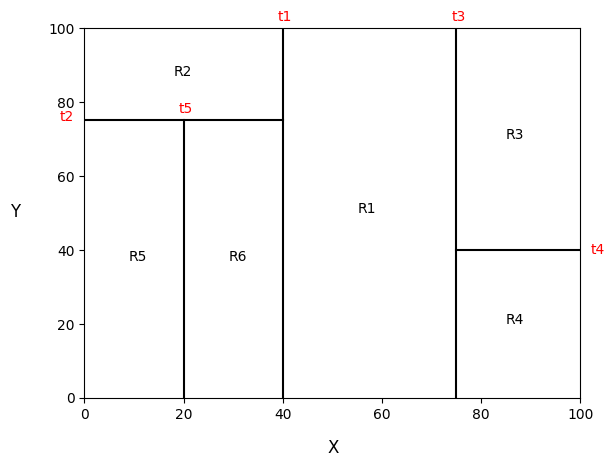

In [ ]:
import matplotlib.pyplot as plt
x1,y1 = [40,40], [0,100]
plt.plot(x1,y1,'k')
plt.text(39,102,'t1', color='red')
plt.text(55,50,'R1')

x2,y2 = [0,40], [75,75]
plt.plot(x2,y2,'k')
plt.text(-5,75, 't2', color='red')
plt.text(18,87,'R2')

x3,y3 = [75,75], [0,100]
plt.plot(x3,y3, 'k')
plt.text(74,102,'t3', color='red')
plt.text(85,70,'R3')

x4,y4 = [75,100], [40,40]
plt.plot(x4,y4, 'k')
plt.text(102,39,'t4', color='red')
plt.text(85,20,'R4')

x5,y5 = [20,20], [0,75]
plt.plot(x5,y5, 'k')
plt.text(19,77,'t5', color='red')
plt.text(9,37,'R5')
plt.text(29,37,'R6')

plt.text(-15,49,'Y',size=12)
plt.text(49,-15,'X',size=12)

plt.xlim([0,100])
plt.ylim([0,100])
plt.show()

And the corresponding decision tree:
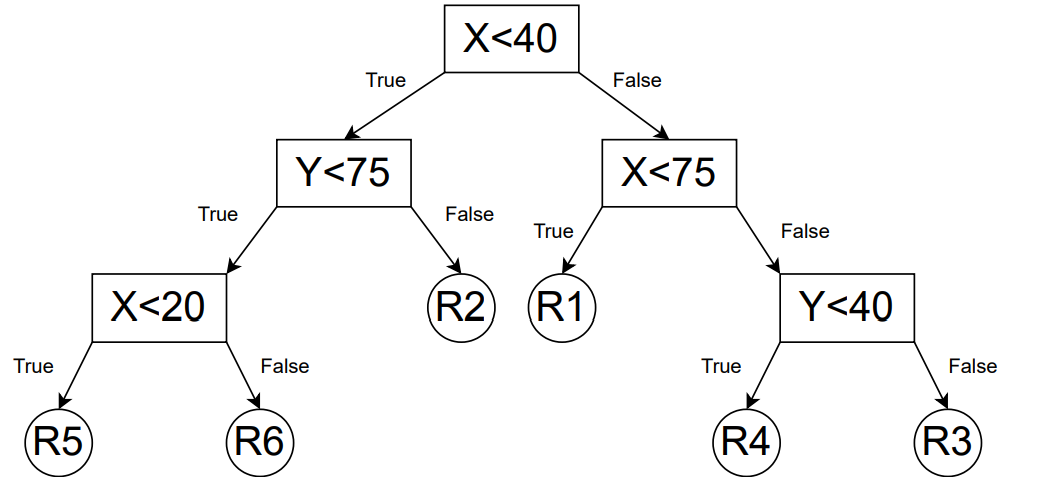

**4.** In 2 dimensions, a linear decision boundary takes the form $\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$. Consider a nn-linear decision boundary:

**a)** Sketch the curve

$$(1 + X_1)^2 + (2 - X_2)^2 = 4$$

Additionally, indicate on your sketch the set of points that verify the condition

$$(1 + X_1)^2 + (2 - X_2)^2 > 4$$

and the condition

$$(1 + X_1)^2 + (2 - X_2)^2 \leq 4$$

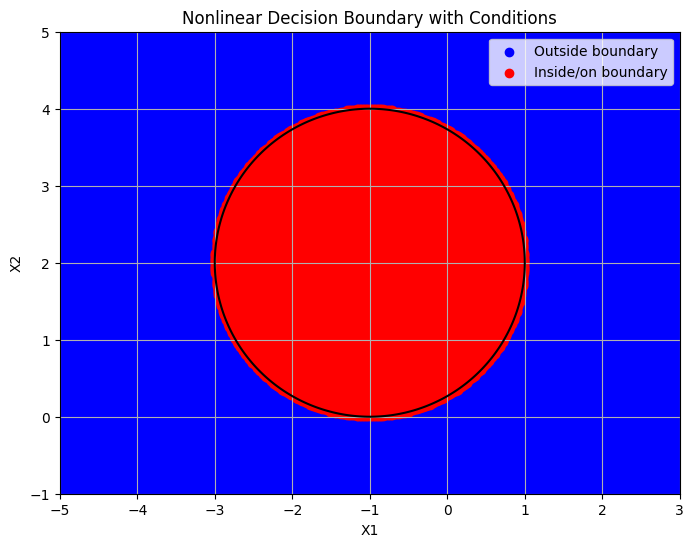

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of values
x = np.linspace(-5, 3, 400)
y = np.linspace(-1, 5, 400)
x, y = np.meshgrid(x, y)

# Define the equation for the boundary
equation = (1 + x)**2 + (2 - y)**2

# Plot the curve
plt.figure(figsize=(8, 6))
plt.contour(x, y, equation, levels=[4], colors='black', linestyles='solid')
plt.contourf(x, y, equation, levels=[0, 4], colors=['lightgreen', 'lightblue'], alpha=0.3)

# Define regions based on conditions
inside_boundary = (1 + x)**2 + (2 - y)**2 <= 4
outside_boundary = (1 + x)**2 + (2 - y)**2 > 4

# Highlight points based on conditions
plt.scatter(x[outside_boundary], y[outside_boundary], color='blue', label='Outside boundary')
plt.scatter(x[inside_boundary], y[inside_boundary], color='red', label='Inside/on boundary')

# Add labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Nonlinear Decision Boundary with Conditions')

# Show legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

**b)** Suppose that a classifier assigns an observation to the blue class if $(1 + X_1)^2 + (2 - X_2)^2 > 4$ and to the red class otherwise. To what class are the following observations classified? (0,0), (-1,1), (2,2), (3,8)

(0,0) belongs to the Blue Class;

(-1,1) belongs to the Red Class;

(2,2) belongs to the Blue Class;

(3,8) belongs to the Blue Class.


**c)** Prove that while the decision boundary in (b) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$.

A decision boundary is linear in terms of a certain parameter, if their coefficients are constant. The expression in b) can be written as $X_1^2 + 2X_1 + X_2^2 - 4X_2 +1 > 0$, where we can clearly verify that it is non-linear in terms of $X_1$ and $X_2$. However, if we define varibales $X_1' = X_1^2$ and $X_2' = X_2^2$, the expression is now written $X_1' + 2X_1 + X_2' - 4X_2 +1 > 0$, where the new variables are also linear, hence proving our point.

# 4) Laboratory Questions

What are the advantages and disadvantages of relational dabases versus graph databases, and when should one type be preferred over the other?

## **Relational Databases**:

### **Advantages**:

- Structured Data: Designed for structured data with well-defined schemas. Data normalization ensures data integrity and consistency.\
- ACID Compliance: Ensures atomicity, consistency, isolation, and durability, which is crucial for transactions.\
- Mature Technology: Relational databases (e.g., MySQL, PostgreSQL) have been around for a long time, offering stability and reliability.\
- Standard Query Language (SQL): SQL provides a powerful and standardized way to manipulate and query data.

### **Disadvantages**:

- Schema Rigidity: Changes in the schema might be challenging, especially when dealing with evolving or unstructured data.\
- Scalability: Can face challenges in scaling horizontally for large-scale, distributed systems.\
- Performance: Complex queries involving multiple joins might lead to performance issues as the database size grows.\
- Not Ideal for Complex Relationships: When dealing with highly interconnected and complex relationships, relational databases might suffer from decreased performance.

## **Graph Databases**:

### **Advantages**:

- Efficient for Relationships: Specifically designed for handling complex relationships between entities.\
- High Performance for Graph Queries: Ideal for traversing relationships and querying graph-like structures.\
- Schema Flexibility: Allows for a more flexible schema, accommodating changes and evolving data models.\
- Scalability for Certain Use Cases: Can scale well for specific use cases involving complex relationships.


### **Disadvantages**:

- Not Suitable for Structured Data: May not be as efficient when dealing with highly structured data as relational databases.\
- Limited Support for Transactions: ACID compliance might not be as robust in graph databases.\
- Query Complexity: While excellent for certain queries, complex graph queries might be challenging to optimize.\
- Immature Technology: Compared to relational databases, graph databases might be considered relatively less mature.

## **Relational vs Graph**
When choosing between relational and graph databases for an application, one should consider their strengths and weaknesses. Relational databases are preferable when working with structured data,  well-defined schemas, and transactional requirements. Traditional applications where data relationships are simple and predictable can be easily covered by this type of databases. Conversely, Graph databases are more relationship-oriented, easily solving complex links. They perform better when dealing with applications that behave as a network.